# Introduction:
**The Nobel Prizes**, established in 1895 by Alfred Nobel, honor individuals and organizations who have made significant contributions in physics, chemistry, medicine, literature, peace, and economic sciences. This project delves into the global landscape of Nobel Prize winners, focusing on trends and patterns over time.

The analysis seeks to answer the following questions:

1. Which countries have won the most Nobel Prizes?

2. Which countries have the most wins in specific categories?

3. What is the distribution of winners by age when they won?

4. How has the gender balance among laureates evolved?

5. Are there historical patterns in the laureates' distribution?



# Data collection
This data collected from https://www.nobelprize.org/organization/developer-zone-2/, includes information from 1901 to 2024. 

Additionally, GDP per capita (current US$), Government expenditure on education, total (% of GDP), Research and development expenditure (% of GDP) and total population data from 1960 to 2023 were collected from https://databank.worldbank.org/source/world-development-indicators# for further analysis.

# Data wrangling/cleaning

 The GDP and total population data were merged with the Nobel Prize dataset. 

GDP and population data will be used to predict a country's likelihood of winning a Nobel Prize.

Overall, there are 2 different datasets:

1 - nobel_prize

2 - gdp_and_population_with_nobel_prize (For further analysis)

The code for data collection and wrangling can be found in File 1.

## Loading the dataset and importing packages

In [7]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import bar_chart_race as bcr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from IPython.display import HTML
from sklearn.ensemble import RandomForestClassifier
# Load the dataset
nobel_df = pd.read_csv("nobel_prize.csv")
nobel_df.head()


,awardYear,dateAwarded,prizeAmount,prizeAmountAdjusted,category.en,categoryFullName.en,winner_id,winner_link,id,given_name,family_name,full_name,gender,birth_date,birth_place_city,birth_place_country,city_now,country_now,continent
0,1901,1901-11-14,150782,9704878,Literature,The Nobel Prize in Literature,569,https://api.nobelprize.org/2/laureate/569,569,Sully,Prudhomme,Sully Prudhomme,male,1839-03-16,Paris,France,Paris,France,Europe
1,1901,1901-12-10,150782,9704878,Peace,The Nobel Peace Prize,462,https://api.nobelprize.org/2/laureate/462,462,Henry,Dunant,Jean Henry Dunant,male,1828-05-08,Geneva,Switzerland,Geneva,Switzerland,Europe
2,1901,1901-12-10,150782,9704878,Peace,The Nobel Peace Prize,463,https://api.nobelprize.org/2/laureate/463,463,Frédéric,Passy,Frédéric Passy,male,1822-05-20,Paris,France,Paris,France,Europe
3,1901,1901-11-12,150782,9704878,Physics,The Nobel Prize in Physics,1,https://api.nobelprize.org/2/laureate/1,1,Wilhelm Conrad,Röntgen,Wilhelm Conrad Röntgen,male,1845-03-27,Lennep,Prussia,Remscheid,Germany,Europe
4,1901,1901-10-30,150782,9704878,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,293,https://api.nobelprize.org/2/laureate/293,293,Emil,von Behring,Emil Adolf von Behring,male,1854-03-15,Hansdorf,Prussia,Lawice,Poland,Europe


The dataset `nobel_prize` contains `1029 observations` and `19 columns`:

1. awardYear: The year the Nobel Prize was awarded.

2. dateAwarded: The exact date of the award.

3. prizeAmount: The monetary value of the prize at the time it was awarded.

4. prizeAmountAdjusted: The monetary value of the prize adjusted for inflation.

5. category.en: The category of the prize (e.g., Physics, Literature).

6. categoryFullName.en: The full name of the prize category (e.g., "The Nobel Prize in Physics").

7. winner_id: A unique ID for each laureate.

8. winner_link: A web link with more details about the laureate.

9. id: A unique ID for each laureate

10. given_name: The first name of the laureate.

11. family_name: The last name of the laureate.

12. full_name: The full name of the laureate (first + last name).

13. gender: The gender of the laureate.

14. birth_date: The birthdate of the laureate.

15. birth_place_city: The city where the laureate was born.

16. birth_place_country: The country where the laureate was born.

17. city_now: The city where the laureate currently lives (if known).

18. country_now: The country where the laureate currently lives (if known).

19. continent: The continent of the laureate's birthplace.



# Data visualization

## Interactive map of Nobel laureates by their country of birth

In [8]:
nobel_country_counts = nobel_df['birth_place_country'].value_counts().reset_index()
nobel_country_counts.columns = ['Country', 'Laureates']

fig = px.choropleth(
    nobel_country_counts,
    locations="Country",
    locationmode="country names",
    color="Laureates",
    color_continuous_scale="Plasma",
    title="Nobel Laureates by Country of Birth",
    labels={"Laureates": "Number of Laureates"}
)

fig.show()
fig.write_image("map_snapshot.png")  
fig.write_html("nobel_laureates_map.html")

![Nobel Laureates Map](map_snapshot.png)


The map shows that the USA has significantly more laureates than other countries.

Most European countries have laureates.

Africa and Oceania have fewer laureates.
 

## Top Countries for Each Nobel Prize Category

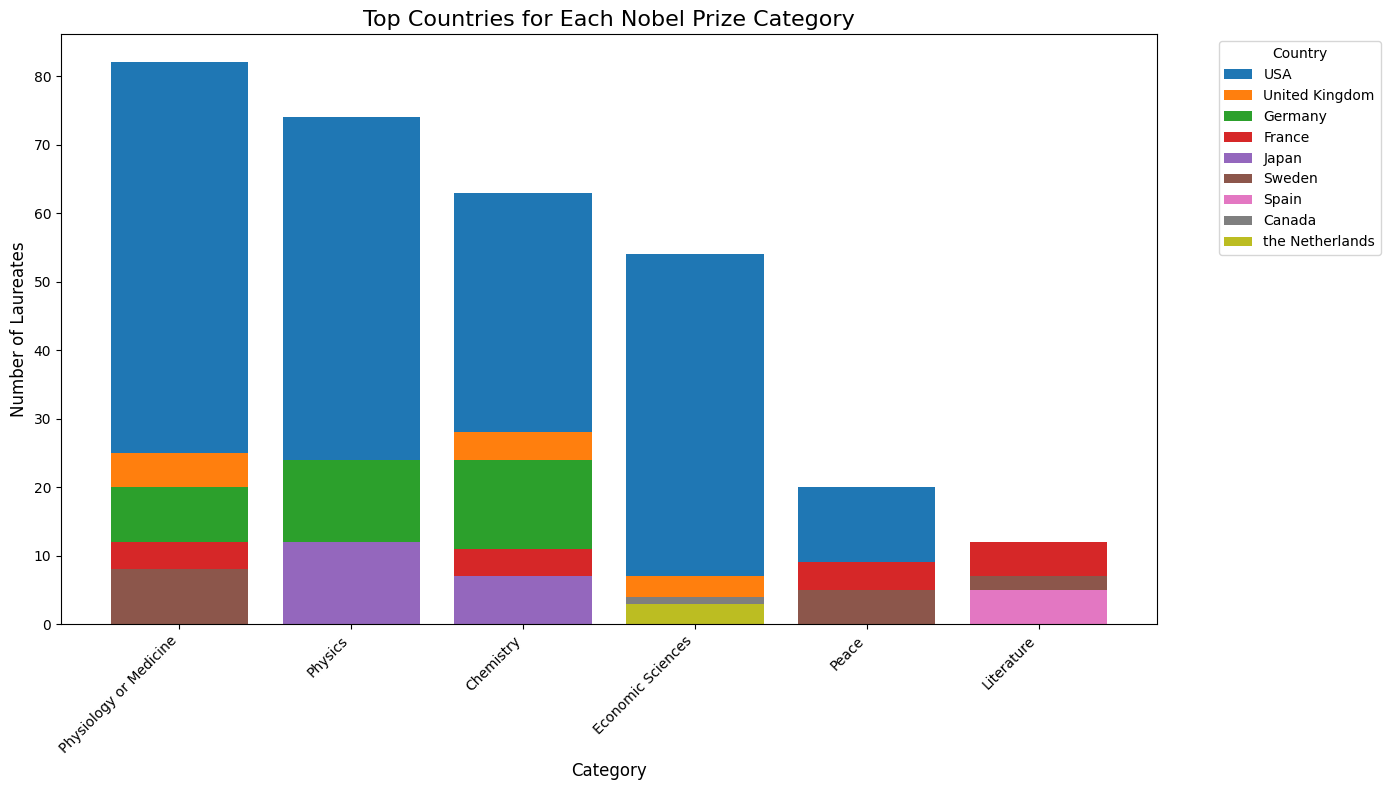

In [9]:

nobel_country_category_counts = nobel_df.groupby(['birth_place_country', 'category.en']).size().reset_index(name='Laureates')

top_countries_by_category = nobel_country_category_counts.sort_values(by='Laureates', ascending=False).groupby('category.en').head(5)


fig, ax = plt.subplots(figsize=(14, 8))

categories = top_countries_by_category['category.en'].unique()
countries = top_countries_by_category['birth_place_country'].unique()

for country in countries:
    data = top_countries_by_category[top_countries_by_category['birth_place_country'] == country]
    ax.bar(data['category.en'], data['Laureates'], label=country)

plt.title("Top Countries for Each Nobel Prize Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Laureates", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


The chart shows the distribution of Nobel laureates across different categories and countries. The USA dominates most categories, especially in Physiology or Medicine, Physics, and Chemistry, reflecting its strong research and innovation. The UK and Germany also contribute significantly, particularly in scientific fields like Physics, Chemistry, and Economic Sciences. Categories like Literature and Peace show a more balanced distribution across countries, with France contributing notably in Literature. Smaller contributions from countries like Sweden and Japan are also visible in specific categories. Overall, the chart highlights the USA's dominance in science and broader global participation in non-science categories.

## The Distribution of Nobel Laureates by gender

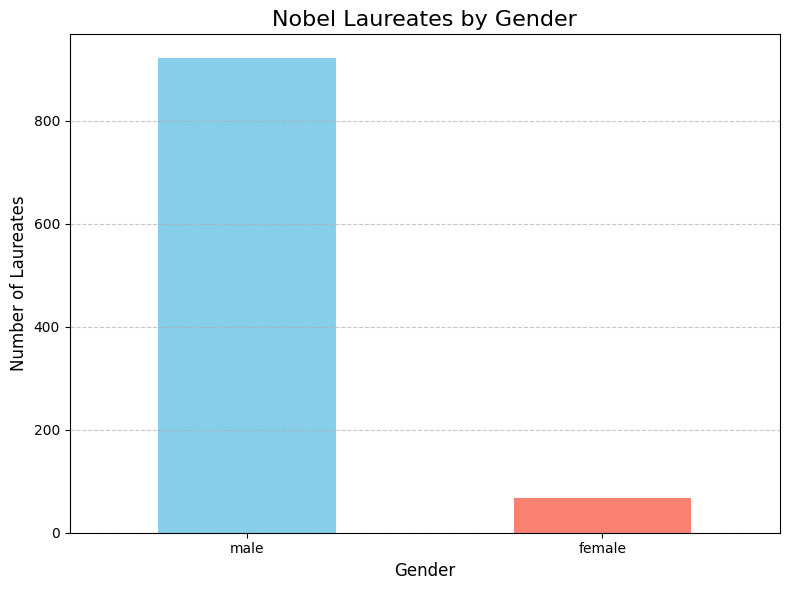

In [10]:

gender_counts = nobel_df['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])


plt.title("Nobel Laureates by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Laureates", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


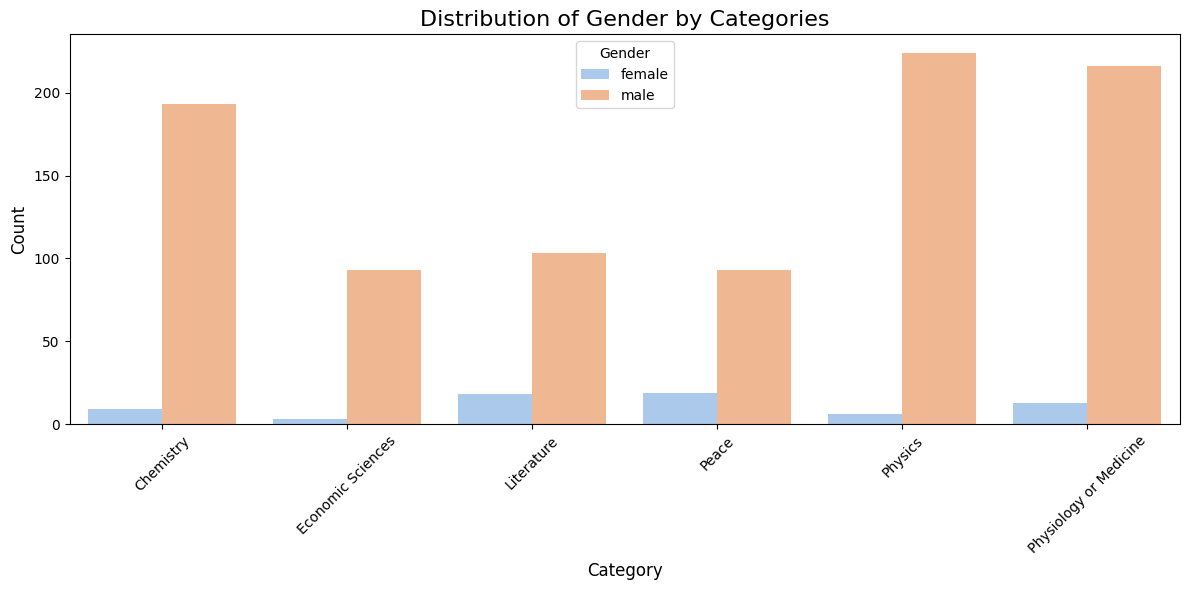

In [11]:
gender_category_counts = nobel_df.groupby(['category.en', 'gender']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_category_counts,
    x='category.en',
    y='Count',
    hue='gender',
    palette='pastel'
)

plt.title('Distribution of Gender by Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


Females who have won the Nobel Prize are significantly fewer than males.
Females have won more frequently in categories such as Literature, Peace, and Physiology or Medicine while males have won more frequently in categories such as Chemistry, Physics, and Physiology or Medicine.

## Age Distribution Of Nobel Laureates At The Time Of Award

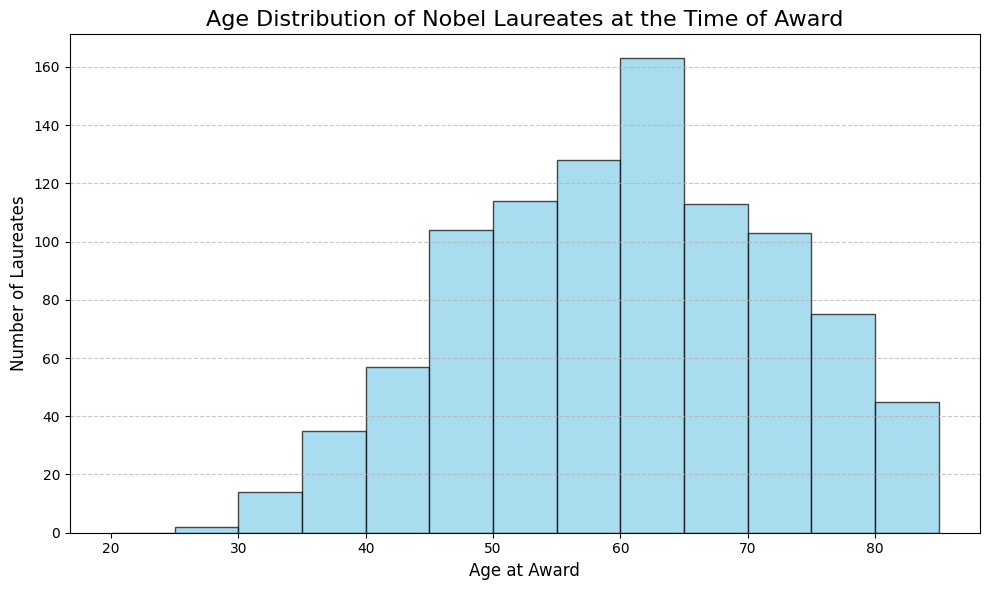

In [12]:
nobel_df['awardYear'] = pd.to_numeric(nobel_df['awardYear'], errors='coerce')
nobel_df['birth_year'] = pd.to_datetime(nobel_df['birth_date'], errors='coerce').dt.year
nobel_df['age_at_award'] = nobel_df['awardYear'] - nobel_df['birth_year']


age_data = nobel_df['age_at_award'].dropna()


plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=np.arange(20, 90, 5), color='skyblue', edgecolor='black', alpha=0.7)


plt.title("Age Distribution of Nobel Laureates at the Time of Award", fontsize=16)
plt.xlabel("Age at Award", fontsize=12)
plt.ylabel("Number of Laureates", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


The histogram illustrates the age distribution of Nobel laureates at the time of receiving their awards. Most laureates tend to receive the prize in their late 40s to early 60s

## Historical patterns over time(gender and country)

In [13]:
def extract_decade(year):
    return (year // 10) * 10

nobel_df['Decade'] = nobel_df['awardYear'].apply(extract_decade)


gender_trends = nobel_df.groupby(['Decade', 'gender']).size().reset_index(name='Count')


fig_gender = px.line(
    gender_trends,
    x="Decade",
    y="Count",
    color="gender",
    title="Gender Distribution of Nobel Laureates Over Time",
    labels={"Decade": "Decade", "Count": "Number of Laureates", "gender": "Gender"}
)
fig_gender.show()


geo_trends = nobel_df.groupby(['Decade', 'birth_place_country']).size().reset_index(name='Count')
geo_trends.columns = ['Decade', 'Country', 'Count']


fig_geo = px.choropleth(
    geo_trends,
    locations="Country",
    locationmode="country names",
    color="Count",
    animation_frame="Decade",
    color_continuous_scale="Viridis",
    title="Geographical Distribution of Nobel Laureates Over Time",
    labels={"Count": "Number of Laureates", "Country": "Country"}
)
fig_geo.show()
fig_gender.write_image("figure_gender.png")  
fig_geo.write_image("figure_geo.png")


![Gender Distribution](figure_gender.png)

---
![Geographic Distribution](figure_geo.png)

In [14]:

country_year_trends = nobel_df.groupby(['awardYear', 'birth_place_country']).size().reset_index(name='Count')
country_year_trends.columns = ['Year', 'Country', 'Count']


data_pivot = country_year_trends.pivot(index='Year', columns='Country', values='Count').fillna(0)
data_cumulative = data_pivot.cumsum()


top_countries = data_cumulative.iloc[-1].nlargest(20).index
data_filtered = data_cumulative[top_countries]


bcr.bar_chart_race(
    df=data_filtered,
    filename='nobel_bar_race.html',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    period_length=500,
    title='Top Countries with Most Nobel Laureates Over Time',
    bar_size=0.95,
    period_label={'x': 0.99, 'y': 0.15, 'ha': 'right', 'va': 'center'},
    cmap='viridis'
)

HTML('nobel_bar_race.html')


/Users/saniyabekova/miniconda3/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/saniyabekova/miniconda3/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/saniyabekova/miniconda3/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Before 1945, European countries dominated the total count of laureates.

In 1945, the USA surpassed all other countries and took the lead.

Japan entered the list of top countries in 2009 and has remained there to this day.

The number of female laureates increased slightly after 1980.

# Data Analysis

We will attempt to predict whether a country has a laureate based on its GDP per capita (current US$), Government expenditure on education, total (% of GDP), Research and development expenditure (% of GDP) and total population.


In [15]:

merged_data = pd.read_csv("nobel_prize_gdp_pop_exp.csv")
merged_data.head()


merged_data['GDP'] = pd.to_numeric(merged_data['GDP per capita (current US$)'], errors='coerce')
merged_data['ExpenditureOnEduc'] = pd.to_numeric(merged_data['Government expenditure on education, total (% of GDP)'], errors='coerce')
merged_data['ResearchAndDevelopmentExpenditure'] = pd.to_numeric(merged_data['Research and development expenditure (% of GDP)'], errors='coerce')
merged_data['Population'] = pd.to_numeric(merged_data['Population, total'], errors='coerce')


merged_data['GDP'] = merged_data['GDP'].fillna(merged_data['GDP'].median())
merged_data['Population'] = merged_data['Population'].fillna(merged_data['Population'].median())
merged_data['ExpenditureOnEduc'] = merged_data['ExpenditureOnEduc'].fillna(merged_data['ExpenditureOnEduc'].median())
merged_data['ResearchAndDevelopmentExpenditure'] = merged_data['ResearchAndDevelopmentExpenditure'].fillna(merged_data['ResearchAndDevelopmentExpenditure'].median())


merged_data['Has_Laureate'] = np.where(merged_data['winner_id'].isnull(), 0, 1)


scaler = StandardScaler()
merged_data[['GDP', 'Population', 'ExpenditureOnEduc', 'ResearchAndDevelopmentExpenditure']] = scaler.fit_transform(merged_data[['GDP', 'Population', 'ExpenditureOnEduc', 'ResearchAndDevelopmentExpenditure']])


X = merged_data[['GDP', 'Population', 'ExpenditureOnEduc', 'ResearchAndDevelopmentExpenditure']]
y = merged_data['Has_Laureate']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)



y_pred_train = model.predict(X_train)
y_pred_proba_train = model.predict_proba(X_train)[:, 1]


roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
print("ROC AUC Score train:", roc_auc_train)
print("\nClassification Report train:\n", classification_report(y_train, y_pred_train))


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score test:", roc_auc)
print("\nClassification Report test:\n", classification_report(y_test, y_pred))


feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
print("\nFeature Importance:\n", feature_importance)


ROC AUC Score train: 0.8254072608734386

Classification Report train:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7829
           1       0.10      0.52      0.17       238

    accuracy                           0.85      8067
   macro avg       0.54      0.69      0.55      8067
weighted avg       0.96      0.85      0.90      8067

ROC AUC Score test: 0.8299037457306573

Classification Report test:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      3374
           1       0.08      0.50      0.15        84

    accuracy                           0.86      3458
   macro avg       0.54      0.68      0.53      3458
weighted avg       0.96      0.86      0.90      3458


Feature Importance:
                              Feature  Importance
0                                GDP    0.282222
1                         Population    0.686496
2                  ExpenditureOnEduc 

The model performs well at predicting countries without laureates but struggles to identify countries with laureates due to class imbalance. It has an ROC AUC score of 0.83 for testing and training, but it fails to effectively predict laureates, with low precision (0.10 train, 0.08 test) and modest recall (0.52 train, 0.50 test)

# Conclusion
In this project, we analyzed Nobel Prize data to understand trends in laureates by country, gender, and category while predicting laureates based on GDP and population. The USA emerged as the dominant country in terms of laureates, surpassing Europe after 1945, possibly due to the impacts of World War II on the Eurasian continent, which disrupted research and development in Europe. Gender analysis showed that females are underrepresented but excel in categories like Literature, Peace, and Medicine, whereas males dominate Chemistry and Physics. Most laureates receive their awards between their late 40s and early 60s. Additionally, the pattern of winners has not diversified significantly over time, with most laureates still coming from a few dominant countries and regions. Similarly, the trend of males winning more than females has also not changed significantly over the years. A logistic regression model was used to predict whether a country has laureates based on GDP and population. While the model achieved moderate performance (ROC AUC: 0.83), it struggled to identify countries with laureates due to class imbalance. 